<a href="https://colab.research.google.com/github/maxvcbhan/DADS5001-car-production/blob/main/production_car_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df_original = pd.read_csv('./data/data_1.csv')

In [5]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

In [ ]:
# ข้อมูลฐานการผลิตรถยนต์ทั่วโลก จะแบ่งเป็น 5 ภูมิภาค โดยในแต่ละภูมิภาคประกอบประเทศต่างๆ
from tabulate import tabulate
filter_df1 = df_original[['Region','Country']]
filter_df1.drop_duplicates(inplace=True)
df_pivot = filter_df1.groupby('Region')['Country'].agg(lambda x: ', '.join(x)).reset_index()
df_pivot.drop_duplicates(inplace=True)

print(tabulate(df_pivot, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════════════════╤═════════════════════════════════════════════════════════════════════════╕
│ Region                 │ Country                                                                 │
╞════════════════════════╪═════════════════════════════════════════════════════════════════════════╡
│ America                │ USA, Canada, Mexico, Brazil, Argentina                                  │
├────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Asia                   │ Japan, China, India, Thailand, South Korea, Indonesia, Malaysia, Taiwan │
├────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Central/Eastern Europe │ Russia, Turkey, Poland, Czech Republic, Romania, Slovakia, Hungary      │
├────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Middle East/Africa     │ Iran, South Africa, Morocco                                     

<ipython-input-6-e16f19c1a62e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df1.drop_duplicates(inplace=True)


In [ ]:
# group segment และกลุ่ม segment ย่อย
filter_df2 = df_original[['Group_Segment','Segment']]
filter_df2.drop_duplicates(inplace=True)
df_pivot2 = filter_df2.groupby('Group_Segment')['Segment'].agg(lambda x: ', '.join(x)).reset_index()
df_pivot2.drop_duplicates(inplace=True)

print(tabulate(df_pivot2, headers='keys', tablefmt='fancy_grid', showindex=False))

<ipython-input-4-45aa480f63be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df2.drop_duplicates(inplace=True)


NameError: name 'tabulate' is not defined

## Figure 1 แสดงจำนวนการผลิตรถยนต์ปี 2014-2023 ของแต่ละภูมิภาค

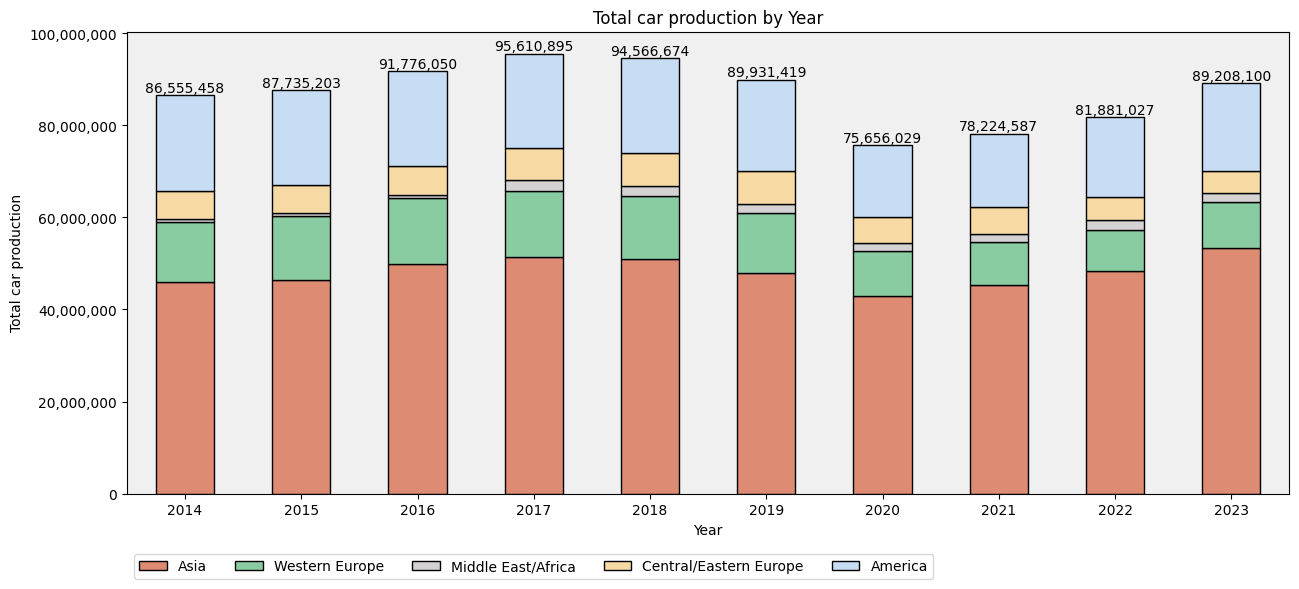

In [ ]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)]
plt.style.use('tableau-colorblind10')
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()

for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)


colors=["#DD8B72","#8ACCA1","#D4D2D3", "#F7DAA3" ,"#C7DDF4",]

# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='Total car production by Year',figsize=(15, 6), color=colors, edgecolor='black')
ax.set_facecolor('#F0F0F0')

plt.xlabel("Year")
plt.ylabel("Total car production")
plt.xticks(rotation=0)
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


ax.legend(loc='lower left', bbox_to_anchor=(0, -0.2), ncol=len(regions))
my_path = os.path.abspath("./figure")
my_file = 'figure1_Total car production by Year.png'
#plt.savefig(os.path.join(my_path, my_file),bbox_inches='tight')

# Figure 2 แสดงค่าเฉลี่ยจำนวนการผลิตรถยนต์แบ่งตามภูมิภาค

<ipython-input-6-d1728e3e63fb>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


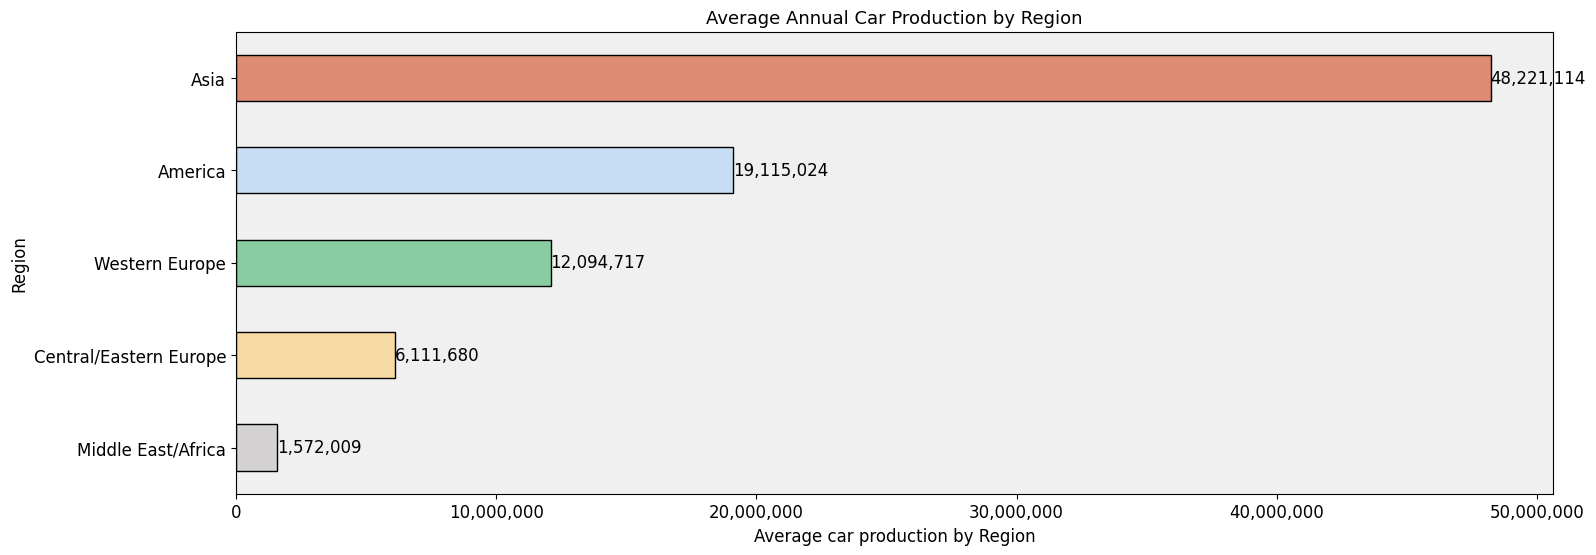

In [ ]:
import matplotlib.pyplot as plt
import os


years = [i for i in range(2014,2024)]
transformed_data = {
    "year": years,
}
years_count = len(years)

# คำนวณค่าเฉลี่ยรายปี
average = df_original.groupby("Region")["Total"].sum() / years_count

# จัดเรียงค่าเฉลี่ยจากน้อยไปมาก
average_sorted = average.sort_values(ascending=True)

colors = ["#D4D2D3", "#F7DAA3", "#8ACCA1", "#C7DDF4", "#DD8B72"]

# สร้างกราฟแท่งแนวนอน (horizontal bar chart)
ax = average_sorted.plot(kind='barh', title='Average Annual Car Production by Region', figsize=(17, 6), color=colors, edgecolor='black')
ax.set_facecolor('#F0F0F0')  # กำหนดสีพื้นหลัง

plt.title('Average Annual Car Production by Region', fontsize=13)
plt.xlabel("Average car production by Region", fontsize=12)
plt.ylabel("Region", fontsize=12)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

for container in ax.containers[:]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=12)  # ปรับขนาดของ data label

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

my_path = os.path.abspath("./figure")
my_file = 'figure2_Average car production by Region.png'
# plt.savefig(os.path.join(my_path, my_file))

plt.show()

# Figure 3 แสดงสัดส่วนจำนวนการผลิตรถยนต์แบ่งตามภูมิภาค (รายปี)

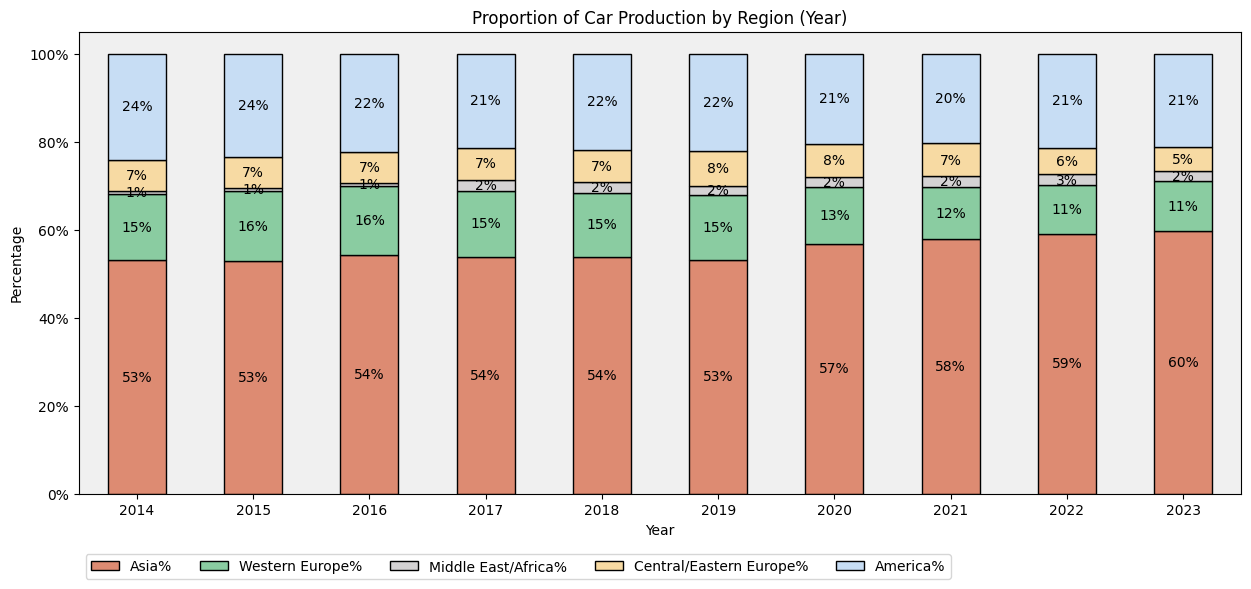

In [ ]:
import matplotlib.pyplot as plt
import os

import numpy as np

years = [i for i in range(2014,2024)]
transformed_data = {
    "year": years,
}

regions = df_original["Region"].unique()

new_data = {

}
percentage_column_name = []
# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    new_data[str(region)+"%"]=[]
    percentage_column_name.append(str(region)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year')
df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)
for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100
colors=["#DD8B72","#8ACCA1","#D4D2D3", "#F7DAA3" ,"#C7DDF4",]
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6), edgecolor='black')
ax.set_facecolor('#F0F0F0')  # สีพื้นหลังเทาอ่อน

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.2), ncol=len(regions))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.title("Proportion of Car Production by Region (Year)")

my_path = os.path.abspath("./figure")
my_file = 'figure3_Proportion of Car Production by Region (Year).png'
#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

# print(selected_df)

# Figure 4 แสดงสัดส่วนจำนวนการผลิตรถยนต์ แบ่งตาม group segment

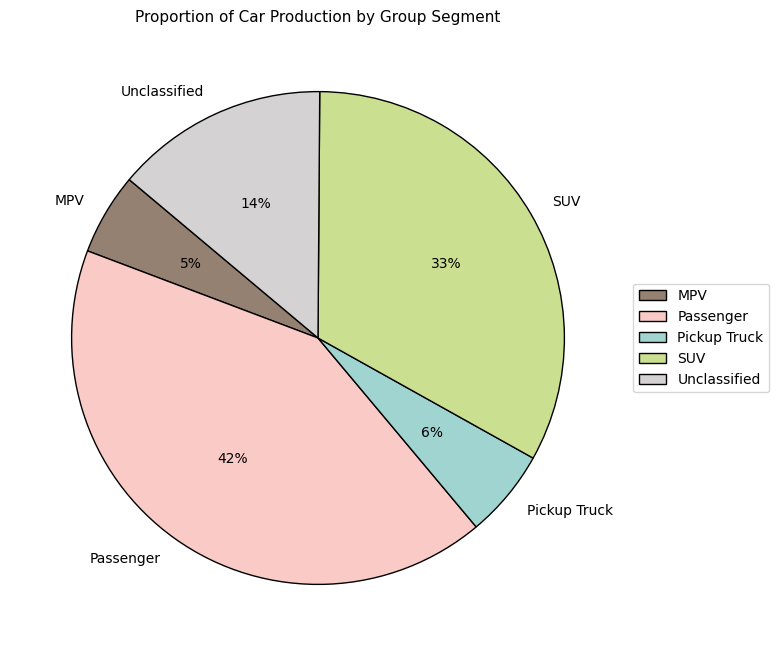

In [ ]:
import matplotlib.pyplot as plt
import os

# สร้างข้อมูลจำลอง
data = df_original.groupby("Group_Segment")["Total"].sum()
labels = data.index.tolist()
sizes = data.values.tolist()

fig, ax = plt.subplots(figsize=(8, 8))
colors = ["#948172", "#FACBC6", "#A0D4D0", "#CBDF91", "#D4D2D3"]

radius = 0.6

patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.0f%%',
                                   startangle=140, colors=colors,
                                   wedgeprops={"edgecolor": "black"})

plt.setp(autotexts, size=10, weight="regular")
plt.setp(texts, size=10)

plt.title("Proportion of Car Production by Group Segment", fontsize=11)
plt.legend(labels, loc="upper right")
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

my_path = os.path.abspath("./figure")
my_file = 'figure4_Proportion of Car Production by Group Segment.png'
# plt.savefig(os.path.join(my_path, my_file))

plt.show()

## Figure 5 แสดงสัดส่วนจำนวนการผลิตรถยนต์แต่ละ group segment (รายปี)

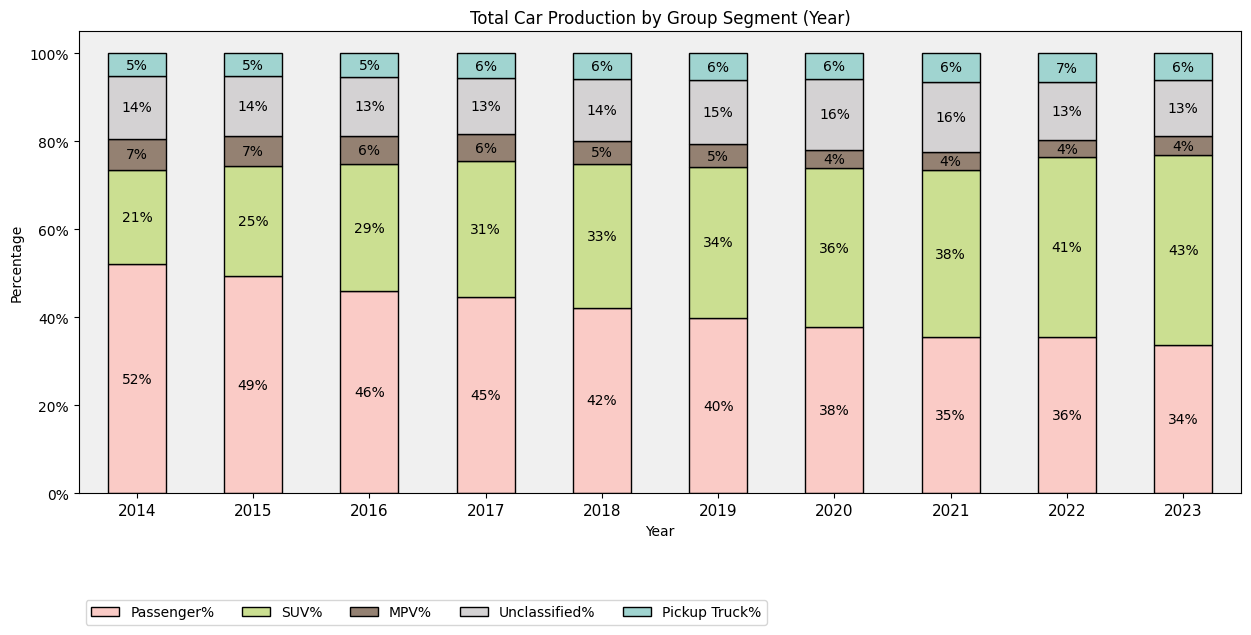

In [ ]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)]
plt.style.use('tableau-colorblind10')

percentage_column_name= []
transformed_data = {
    "year": years,
}
group_segments = df_original["Group_Segment"].unique()

for group_segment in group_segments:
    transformed_data[str(group_segment)]=[]
    percentage_column_name.append(str(group_segment)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Group_Segment"] == group_segment)][str(year)].sum()
        transformed_data[str(group_segment)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)

for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100

# Include 'year' in the percentage_column_name list
percentage_column_name.append('year')  # Add this line

selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]
#print(selected_df)
colors = ["#FACBC6","#CBDF91" ,"#948172", "#D4D2D3", "#A0D4D0"]


ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6), edgecolor='black')
ax.set_facecolor('#F0F0F0')


for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=len(regions))
plt.xticks(rotation=0, fontsize=11)

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.title("Total Car Production by Group Segment (Year)")

my_path = os.path.abspath("./figure")
my_file = 'figure_5_Total Car Production by Group Segment (ํYear).png'
#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

# Figure 6  แสดงสัดส่วนจำนวนการผลิตรถยนต์แต่ละ segment (รายปี)

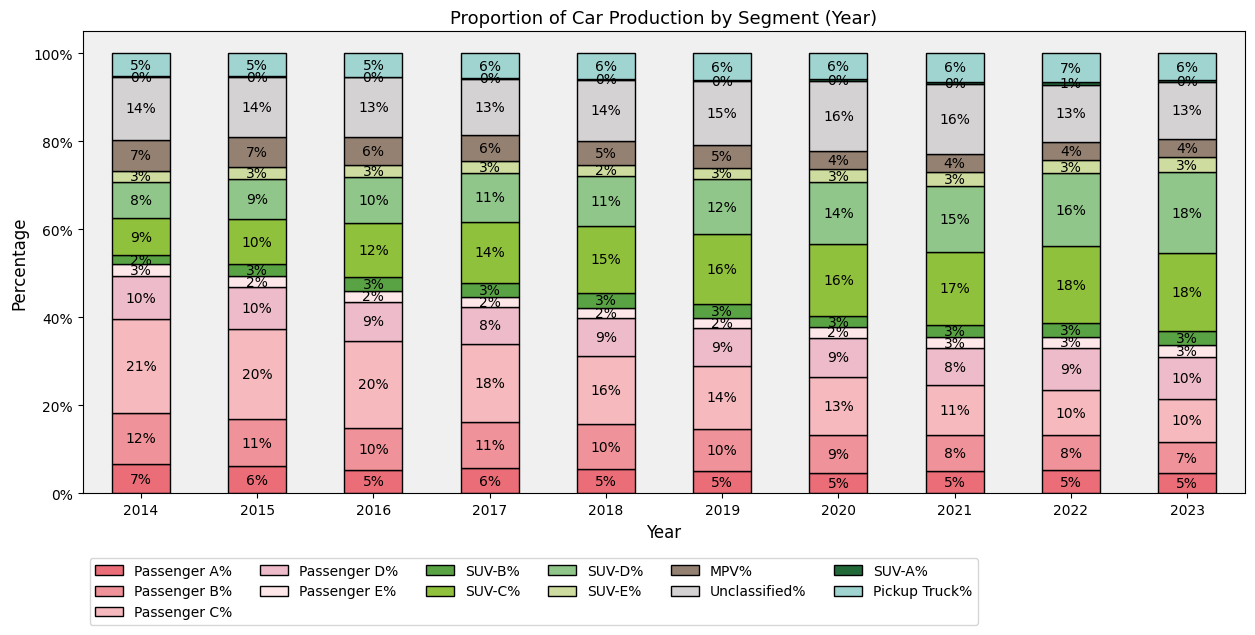

In [ ]:
import matplotlib.pyplot as plt
import os

years = [i for i in range(2014, 2024)]
plt.style.use('tableau-colorblind10')

percentage_column_name = []
transformed_data = {
    "year": years,
}
group_segments = df_original["Segment"].unique()

for group_segment in group_segments:
    transformed_data[str(group_segment)] = []
    percentage_column_name.append(str(group_segment) + "%")
    for year in years:
        sum_by_year = df_original[(df_original["Segment"] == group_segment)][str(year)].sum()
        transformed_data[str(group_segment)].append(sum_by_year)

df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year')
percentage_column_name.append('Total')

df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)

for i in range(1, len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i] + "%"] = (df_transformed.iloc[:, i] / df_transformed.iloc[:, 14]) * 100

percentage_column_name.remove('Total')
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

colors = ["#EA6D78", "#EF929A", "#F5B9BE", "#EEBBCA", "#FDE7E9", "#59A344", "#90C13C", "#90C68A", "#CEDC9F", "#948172", "#D4D2D3", "#22693A", "#A0D4D0"]

ax = selected_df.plot(kind='bar', x='year', stacked=True, color=colors, figsize=(15, 6), edgecolor='black')
ax.set_facecolor('#F0F0F0')

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

ax.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=6)

plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(rotation=0)
plt.title("Proportion of Car Production by Segment (Year)", fontsize=13)

my_path = os.path.abspath("./figure")
my_file = 'figure_6_Proportion of Car Production by Segment (Year).png'
# plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

plt.show()

# Figure 7   แสดงสัดส่วนจำนวนการผลิตรถยนต์แบ่งตามภูมิภาค

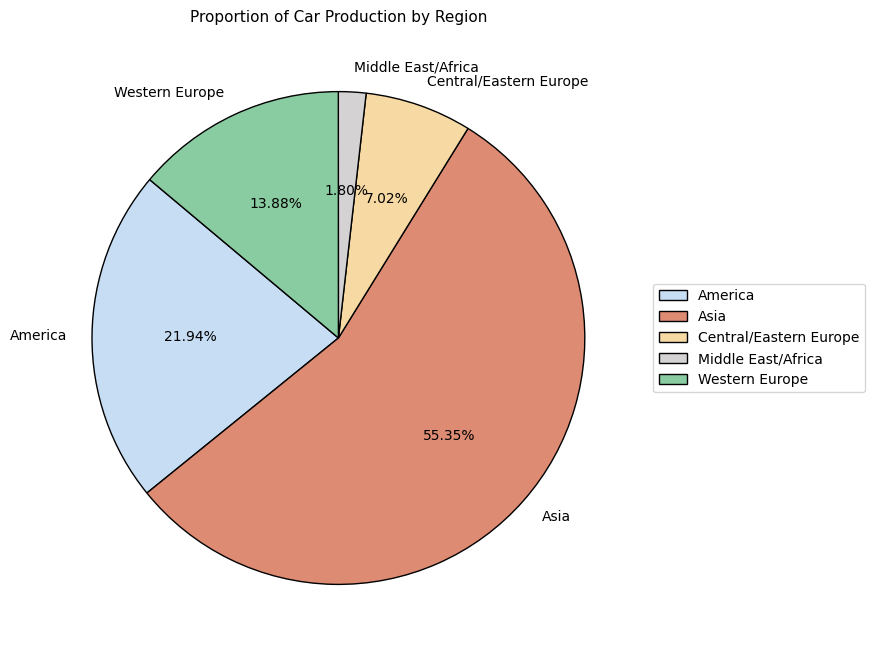

In [ ]:
import matplotlib.pyplot as plt


data = df_original.groupby("Region")["Total"].sum()
labels = data.index.tolist()
sizes = data.values.tolist()

fig, ax = plt.subplots(figsize=(8, 8))

radius = 0.6

colors=["#C7DDF4","#DD8B72","#F7DAA3", "#D4D2D3" ,"#8ACCA1",]
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors,wedgeprops={"edgecolor": "black"}, textprops={'fontsize': 10})

plt.title("Proportion of Car Production by Region", fontsize=11)
plt.legend(labels, loc="upper right")
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

my_path = os.path.abspath("./figure")
my_file = 'Figure7_Proportion of Car Production by Region.png'
#plt.savefig(os.path.join(my_path, my_file))

# Figure 8 แสดงจำนวนการผลิตรถยนต์ของประเทศภายในภูมิภาค Asia

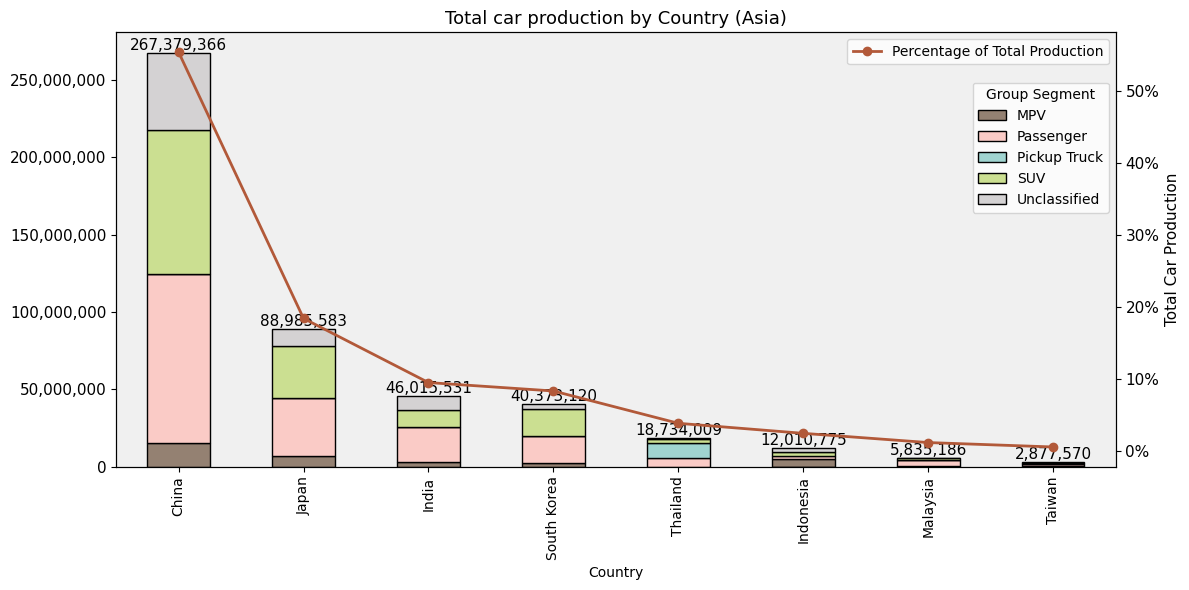

In [32]:
import matplotlib.pyplot as plt
import os

filter_asia = df_original[df_original["Region"] == "Asia"]
grouped_data = filter_asia.groupby(['Country', 'Group_Segment'])['Total'].sum().unstack(fill_value=0)
region_totals = filter_asia.groupby('Country')['Total'].sum()

sorted_regions = region_totals.sort_values(ascending=False).index
grouped_data_sorted = grouped_data.loc[sorted_regions]

colors = ["#948172", "#FACBC6", "#A0D4D0", "#CBDF91", "#D4D2D3"]
group_segments = grouped_data_sorted.columns

ax = grouped_data_sorted.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors, edgecolor='black')

ax.set_facecolor('#F0F0F0')

ax.bar_label(ax.containers[-1], fmt='{:,.0f}', label_type='edge', fontsize=11)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

total_production = region_totals.sum()
percentage_production = (region_totals / total_production) * 100

percentage_production_sorted = percentage_production.loc[sorted_regions]

ax2 = ax.twinx()
percentage_production_sorted.plot(kind='line', marker='o', color='#B25939', ax=ax2, linewidth=2, label='Percentage of Total Production')
ax2.set_ylabel('Percentage of Total Production (%)', fontsize=1)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax2.tick_params(axis='y', labelsize=11)

plt.title("Total car production by Country (Asia)", fontsize=13)
plt.ylabel("Total Car Production", fontsize=11)
plt.xlabel("Country", fontsize=11)

plt.xticks(fontsize=12)
ax.tick_params(axis='y', labelsize=11)

ax.legend(loc='upper right',bbox_to_anchor=(0.5, 0., 0.5, 0.9), title="Group Segment")
ax2.legend(loc='upper right')

plt.xticks(rotation=0)
plt.tight_layout()

my_path = os.path.abspath("./figure")
my_file = 'figure_8_Total_car_production_by_Country (Asia).png'

# plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')
plt.show()

# Figure 9  แสดงสัดส่วนจำนวนการผลิตรถยนต์แบ่งตาม group segment (Country)

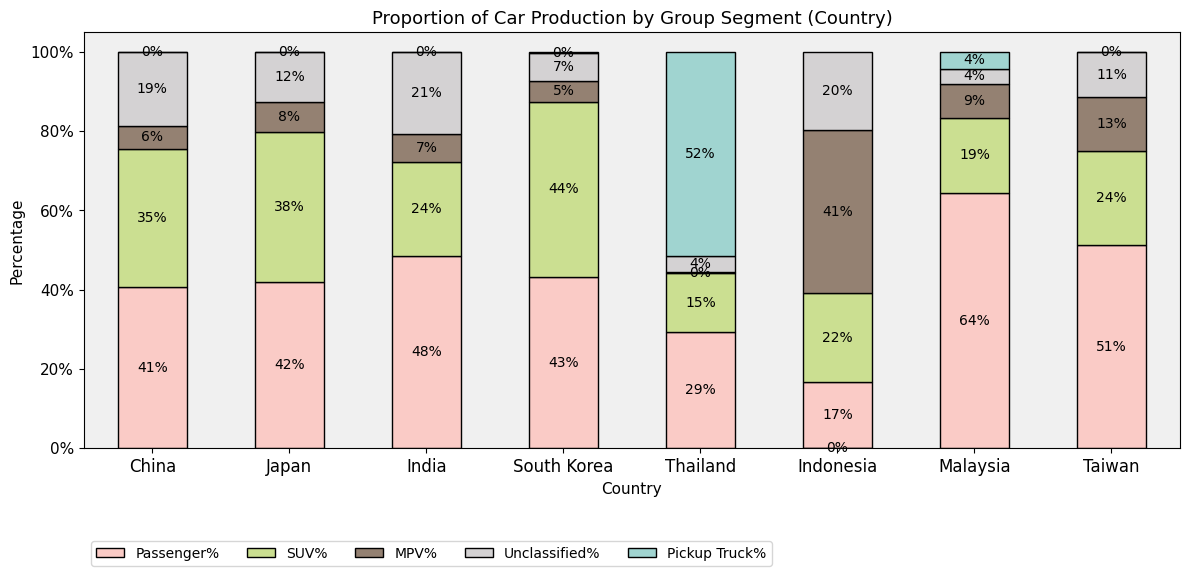

In [ ]:
import matplotlib.pyplot as plt
import os
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

filter_asia = df_original[df_original["Region"] == "Asia"]
countries = filter_asia["Country"].unique()
plt.style.use('tableau-colorblind10')

country_order = ["China", "Japan", "India", "South Korea", "Thailand", "Indonesia", "Malaysia", "Taiwan"]

percentage_column_name = []
transformed_data = {
    "Country": countries,
}
group_segments = df_original["Group_Segment"].unique()

for group_segment in group_segments:
    transformed_data[str(group_segment)] = []
    percentage_column_name.append(str(group_segment) + "%")
    for country in countries:
        sum_by_country = filter_asia[(df_original["Group_Segment"] == group_segment) & (filter_asia["Country"] == country)]["Total"].sum()
        transformed_data[str(group_segment)].append(sum_by_country)

df_transformed = pd.DataFrame(transformed_data)

df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)

for i in range(1, len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i] + "%"] = (df_transformed.iloc[:, i] / df_transformed['Total']) * 100

percentage_column_name.append('Country')

selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

selected_df['Country'] = pd.Categorical(selected_df['Country'], categories=country_order, ordered=True)

sorted_df = selected_df.sort_values(by='Country')

colors = ["#FACBC6", "#CBDF91", "#948172", "#D4D2D3", "#A0D4D0"]

ax = sorted_df.plot(kind='bar', x='Country', stacked=True, color=colors, figsize=(12, 6), edgecolor='black')
ax.set_facecolor('#F0F0F0')


for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

plt.ylabel("Percentage", fontsize=11)
plt.xlabel("Country", fontsize=11)
plt.title("Proportion of Car Production by Group Segment (Country)", fontsize=13)

plt.xticks(fontsize=12)
ax.tick_params(axis='y', labelsize=11)
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=len(group_segments))

plt.xticks(rotation=0)
plt.tight_layout()

my_path = os.path.abspath("./figure")
my_file = 'figure9_Proportion of Car Production by Group Segment (Country).png'
# plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

plt.show()

# Figure 10 แสดงสัดส่วนจำนวนการผลิตรถยนต์แบ่งตาม group segment (รายปี)

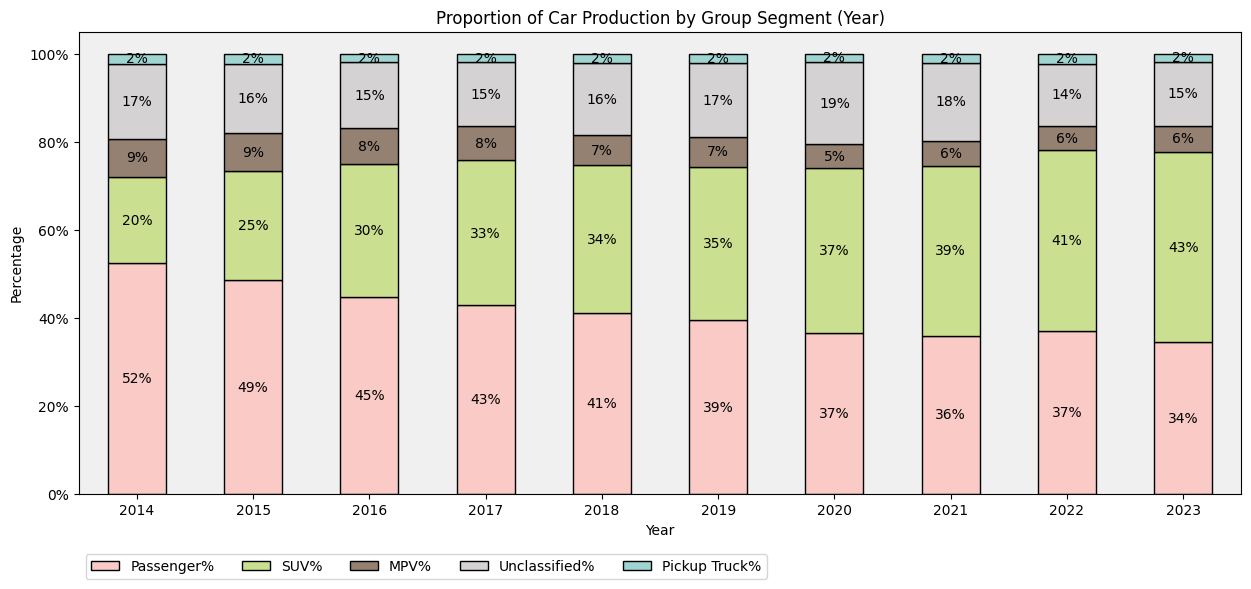

In [ ]:
import matplotlib.pyplot as plt
import os

import numpy as np

filter_asia = df_original[df_original["Region"] == "Asia"]
years = [i for i in range(2014,2024)]
transformed_data = {
    "year": years,
}

segment = filter_asia["Group_Segment"].unique()

new_data = {

}
percentage_column_name = []

for group_seg in segment:
    transformed_data[str(group_seg)]=[]
    new_data[str(group_seg)+"%"]=[]
    percentage_column_name.append(str(group_seg)+"%")
    for year in years:
        sum_by_year = filter_asia[ (filter_asia["Group_Segment"] == group_seg)][str(year)].sum()
        transformed_data[str(group_seg)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year')
df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)
for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100
colors=["#FACBC6", "#CBDF91", "#948172","#D4D2D3","#A0D4D0"]
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6), edgecolor='black')
ax.set_facecolor('#F0F0F0')

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.2), ncol=len(segment))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.title("Proportion of Car Production by Group Segment (Year)")

my_path = os.path.abspath("./figure")
my_file = 'figure_10_Proportion of Car Production by Group Segment (Year).png'
#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')


# Figure 11 แสดงสัดส่วนจำนวนการผลิตรถยนต์แบ่งตาม segment (รายปี)

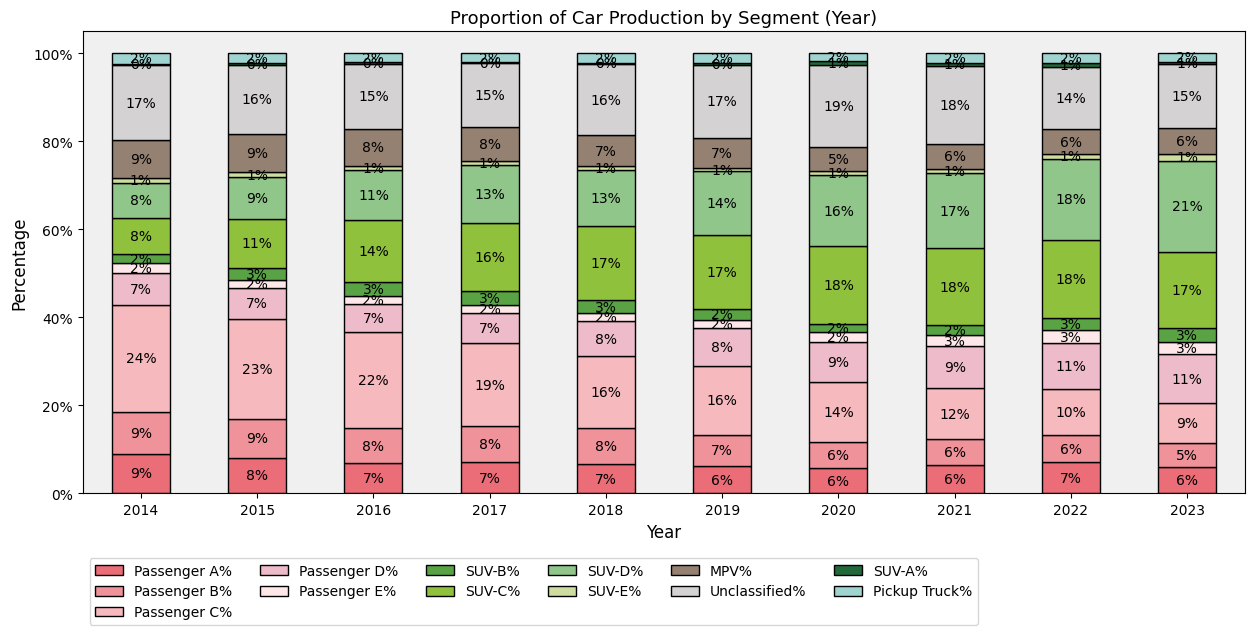

In [ ]:
import matplotlib.pyplot as plt
import os


filter_asia = df_original[df_original["Region"] == "Asia"]
years = [i for i in range(2014,2024)]
plt.style.use('tableau-colorblind10')

percentage_column_name = []
transformed_data = {
    "year": years,
}
segments = filter_asia["Segment"].unique()

for segment in segments:
    transformed_data[str(segment)]=[]
    percentage_column_name.append(str(segment)+"%")
    for year in years:
        sum_by_year = filter_asia[ (filter_asia["Segment"] == segment)][str(year)].sum()
        transformed_data[str(segment)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year')
percentage_column_name.append('Total')


df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1)

for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 14] ) * 100

percentage_column_name.remove('Total')
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

colors=["#EA6D78","#EF929A","#F5B9BE","#EEBBCA","#FDE7E9","#59A344","#90C13C","#90C68A","#CEDC9F","#948172","#D4D2D3","#22693A","#A0D4D0"]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6), edgecolor='black')
ax.set_facecolor('#F0F0F0')

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

ax.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=len(segments))

ax.legend(loc='lower left', bbox_to_anchor=(0, -0.3), ncol=6)

plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(rotation=0)
plt.title("Proportion of Car Production by Segment (Year)", fontsize=13)

my_path = os.path.abspath("./figure")
my_file = 'figure_11_Proportion of Car Production by Segment (Year).png'

#plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')

# วิเคราะห์ความสัมพันธ์ ระดับ Group Segment ของประเทศที่ยังไม่พบความสัมพันธ์ในภาพรวม

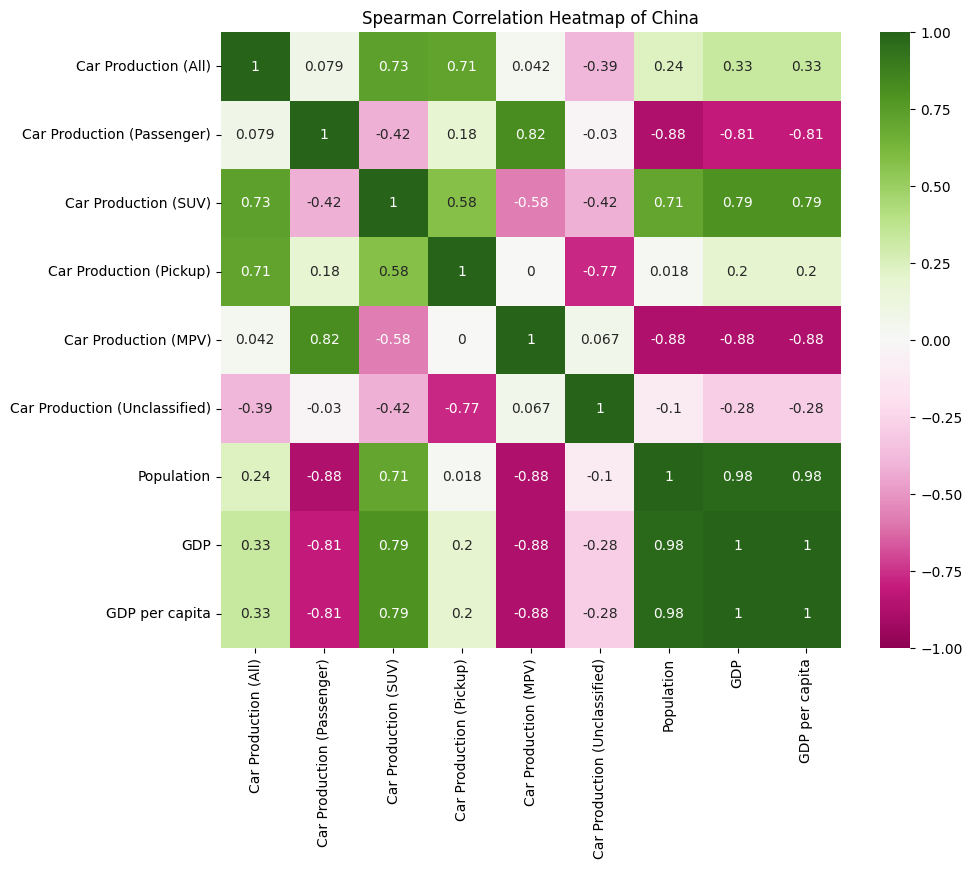

In [41]:
#China
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างข้อมูล
data = {
    'Car Production (All)': [23722890.00,24503326.00,28118794.00,29015440.00,27809200.00,25720665.00,25225246.00,26082220.00,27020617.00,30160968.00],
    'Car Production (Passenger)': [12162273.00,11300137.00,11720956.00,11666045.00,11252983.00,10002963.00,8955544.00,9700745.00,10965555.00,11242455.00],
    'Car Production (SUV)' : [4220621.00,6206851.00,9070084.00,10249858.00,9887761.00,9339302.00,9400758.00,9999769.00,11374545.00,13284477.00],
    'Car Production (Pickup)': [53.00,90.00,310.00,485.00,638.00,322.00,0.00,0.00,498.00,1445.00],
    'Car Production (MPV)' : [1970473.00,2131769.00,2292326.00,2042603.00,1672625.00,1348750.00,982610.00,1064140.00,955899.00,1118685.00],
    'Car Production (Unclassified)' : [5369470.00,4864479.00,5035118.00,5056449.00,4995193.00,5029328.00,5886334.00,5317566.00,3724120.00,4513906.00],
    'Population' : [1371860000.00,1379860000.00,1387790000.00,1396215000.00,1402760000.00,1407745000.00,1411100000.00,1412360000.00,1412175000.00,1410710000.00],
    'GDP' : [10475624944355.20,11061572618578.70,11233313730348.70,12310491333980.90,13894907857880.60,14279968506271.70,14687744162801.00,17820459508852.20,17881783387000.90,17794781986104.50],
    'GDP per capita' : [7636.07,8016.45,8094.39,8817.05,9905.41,10143.86,10408.72,12617.51,12662.58,12614.06]
}

df = pd.DataFrame(data)

# คำนวณ Spearman correlation
corr = df.corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='PiYG', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Heatmap of China')

my_path = os.path.abspath("./figure")
my_file = 'fig_heatmap_china.png'
plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')
plt.show()

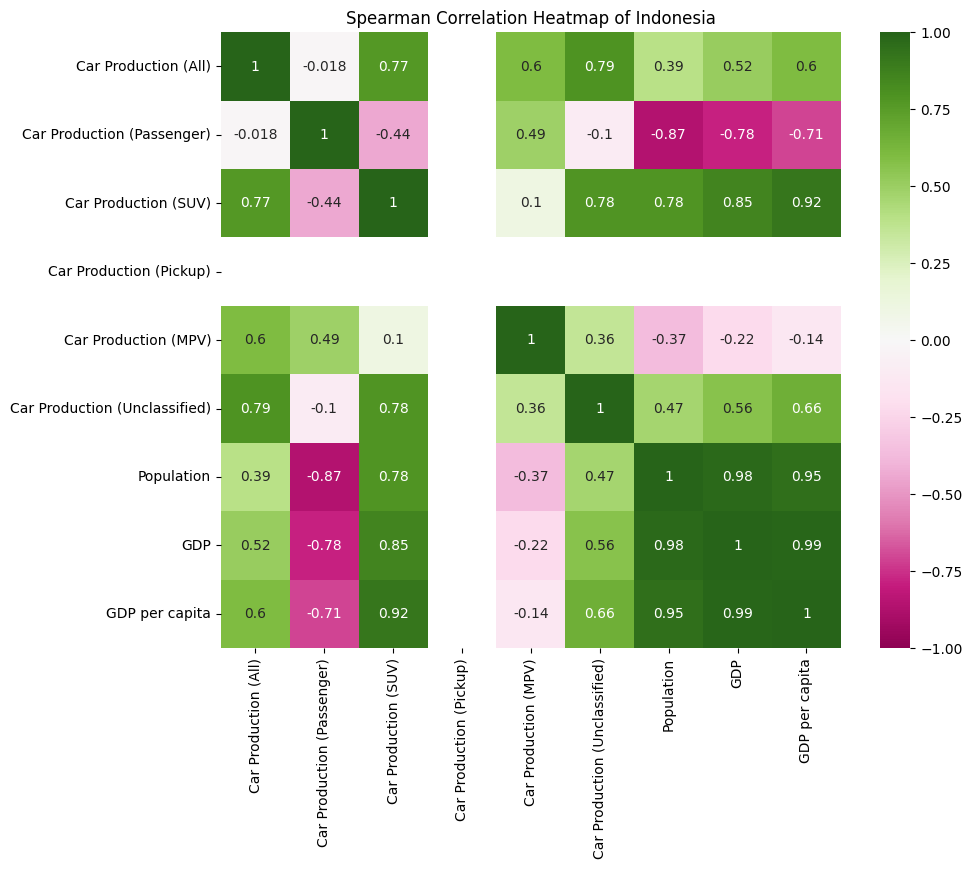

In [44]:
#Indonesia
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างข้อมูล
data = {
    'Car Production (All)' : [1289865.00,1092596.00,1103439.00,1216615.00,1343714.00,1286848.00,690150.00,1121685.00,1470146.00,1395717.00],
    'Car Production (Passenger)': [289246.00,244780.00,251938.00,194611.00,205979.00,205454.00,122696.00,168054.00,173718.00,147934.00],
    'Car Production (SUV)' : [165088.00,154562.00,195488.00,219892.00,281656.00,265787.00,163928.00,310115.00,464042.00,468997.00],
    'Car Production (Pickup)' : [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    'Car Production (MPV)' : [600703.00,478110.00,470546.00,574865.00,574706.00,560193.00,242784.00,379625.00,534496.00,524203.00],
    'Car Production (Unclassified)' : [234828.00,215144.00,185467.00,227247.00,281373.00,255414.00,160742.00,263891.00,297890.00,254583.00],
    'Population' :  [256229761.00,259091970.00,261850182.00,264498852.00,267066843.00,269582878.00,271857970.00,273753191.00,275501339.00,277534122.00],
    'GDP' : [890814755533.54,860854232686.21,931877364037.70,1015618744159.73,1042271532988.63,1119099871350.20,1059054842698.48,1186509691086.73,1319076267310.16,1371171152331.16],
    'GDP per capita' : [3476.62,3322.58,3558.82,3839.79,3902.66,4151.23,3895.62,4334.23,4787.91,4940.55]

}

df = pd.DataFrame(data)

# คำนวณ Spearman correlation
corr = df.corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='PiYG', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Heatmap of Indonesia')
my_path = os.path.abspath("./figure")
my_file = 'fig_heatmap_indonesia.png'
plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')
plt.show() 

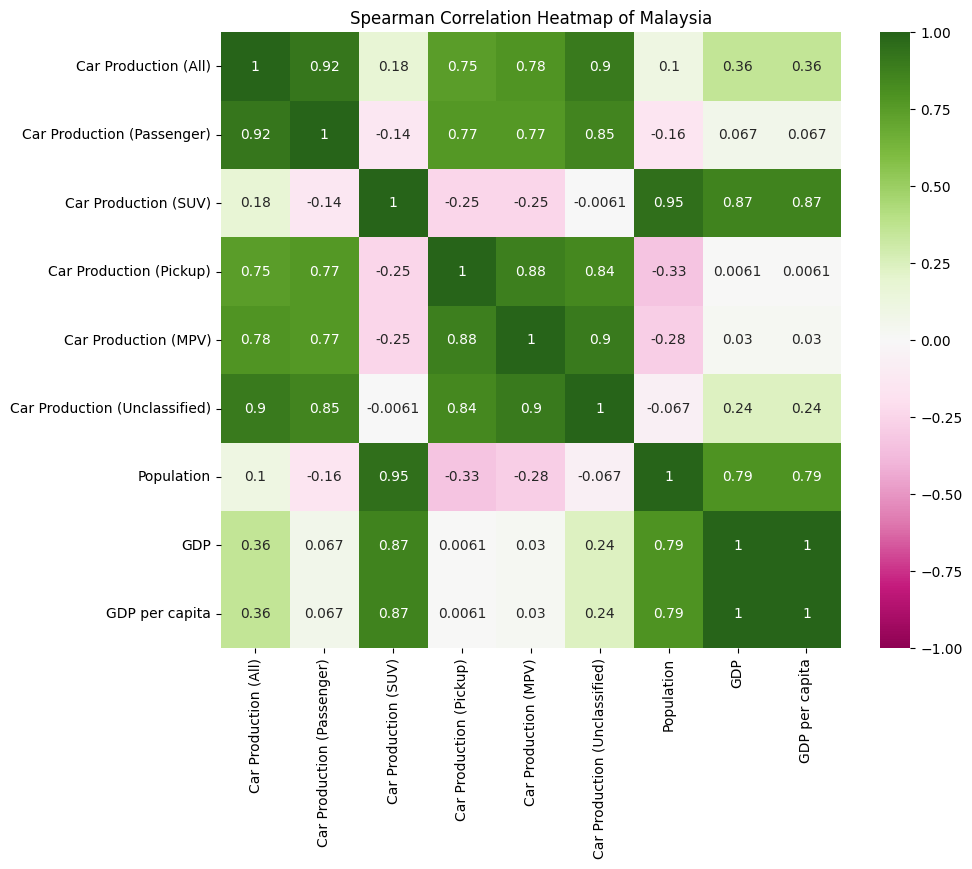

In [43]:
#Malaysia
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่าง
data = {
    'Car Production (All)' : [596418.00,614664.00,545253.00,499639.00,564971.00,571632.00,485186.00,481651.00,701172.00,774600.00],
    'Car Production (Passenger)': [421736.00,438528.00,377221.00,324960.00,377020.00,387024.00,340242.00,270045.00,388196.00,438059.00],
    'Car Production (SUV)' : [33923.00,57057.00,73415.00,81174.00,99581.00,113729.00,89033.00,144899.00,207243.00,205361.00],
    'Car Production (Pickup)' : [28434.00,33395.00,24257.00,23497.00,26013.00,19024.00,15887.00,19559.00,28278.00,27782.00],
    'Car Production (MPV)' : [82828.00,62904.00,48037.00,50417.00,41718.00,31970.00,27912.00,31203.00,53017.00,70165.00],
    'Car Production (Unclassified)' : [29497.00,22780.00,22323.00,19591.00,20639.00,19885.00,12112.00,15945.00,24438.00,33233.00],
    'Population' :  [30606459.00,31068833.00,31526418.00,31975806.00,32399271.00,32804020.00,33199993.00,33573874.00,33938221.00,34308525.00],
    'GDP' : [338066095097.25,301355266964.95,301256033870.33,319109094160.34,358788845712.53,365177721021.52,337456163961.21,373832428055.45,407027451714.62,399648828546.50],
    'GDP per capita' : [11045.58,9699.60,9555.67,9979.70,11073.98,11132.10,10164.34,11134.62,11993.19,11648.67]
}

df = pd.DataFrame(data)

# คำนวณ Spearman correlation
corr = df.corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='PiYG', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Heatmap of Malaysia')
plt.show()

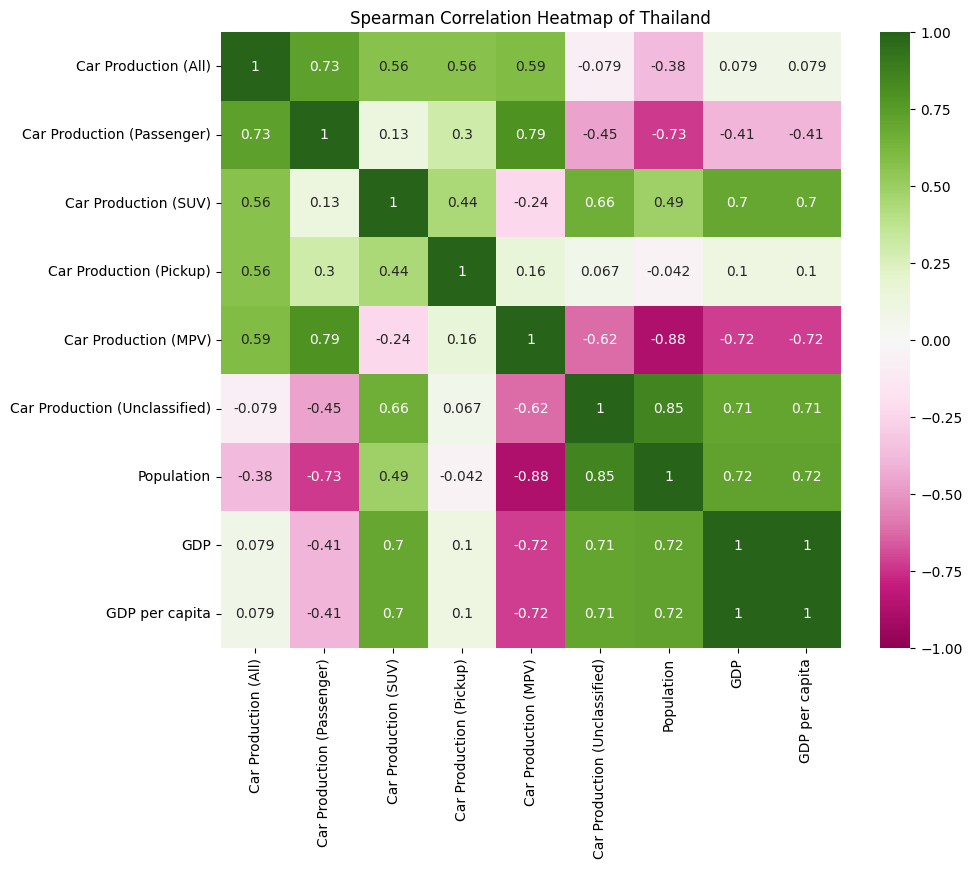

In [36]:
#Thailand
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างข้อมูล
data = {
    'Car Production (All)' : [1880007.00,1913644.00,1944417.00,1988823.00,2162439.00,2013710.00,1427074.00,1685394.00,1883515.00,1834986.00],
    'Car Production (Passenger)': [665189.00,647779.00,671160.00,654046.00,667972.00,603940.00,367285.00,396872.00,416998.00,414678.00],
    'Car Production (SUV)' : [162144.00,235548.00,292869.00,296056.00,356551.00,301060.00,235345.00,281401.00,298701.00,317833.00],
    'Car Production (Pickup)' : [999733.00,966919.00,911336.00,960413.00,1068299.00,1025341.00,761918.00,922260.00,1084224.00,956941.00],
    'Car Production (MPV)' : [3810.00,9420.00,6330.00,5730.00,3416.00,1951.00,420.00,600.00,749.00,2.00],
    'Car Production (Unclassified)' : [49131.00,53978.00,62722.00,72578.00,66201.00,81418.00,62106.00,84261.00,82843.00,145532.00],
    'Population' :  [69960943.00,70294397.00,70607037.00,70898202.00,71127802.00,71307763.00,71475664.00,71601103.00,71697030.00,71801279.00],
    'GDP' : [407339040197.65,401296238228.08,413366349747.51,456356813536.76,506754208404.49,543976691793.89,500461898480.25,506256494297.34,495645210972.75,514944993833.58],
    'GDP per capita' : [5822.38,5708.79,5854.46,6436.79,7124.56,7628.58,7001.85,7070.51,6913.05,7171.81]
}

df = pd.DataFrame(data)

# คำนวณ Spearman correlation
corr = df.corr(method='spearman')

# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='PiYG', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Heatmap of Thailand')
plt.show()